### Conditions description:
<ul>
    <li>C1 = low interference, easy search -> 'SearchDomain' diff, 'SearchLevel' easy</li>
    <li>C2 = low interference, hard search -> 'SearchDomain' diff, 'SearchLevel' hard</li>
    <li>C3 = high interference, easy search -> 'SearchDomain' same, 'SearchLevel' easy</li>
    <li>C4 = high interference, hard search -> 'SearchDomain' same, 'SearchLevel' hard</li>
</ul>

Questions: 
<br> Each behavioral data 'txt' files refers to 'one participant run' right? One events file for 8 runs?
<br> All 8 fmri runs were collected with the same scanning (affine)?
<br> Cue and probe always same stimuli category?

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nibabel as nib
import nilearn
from nilearn.plotting import view_img, glass_brain, plot_stat_map
from bids import BIDSLayout, BIDSValidator

/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load fMRI data

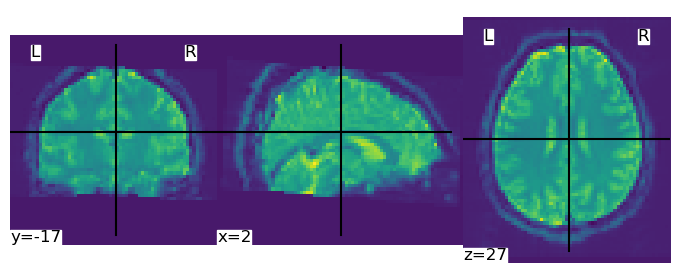

In [74]:
from nilearn.image import concat_imgs, mean_img, resample_img
from nilearn import plotting

# First run data
img = nib.load("DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz")
path = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
fmri_img = concat_imgs(path)

# Obtain mean image from first participant fmri session
# 'mean_img' will be useful to set a background to plot contrasts against
mean_img = mean_img(fmri_img)
plotting.plot_img(mean_img)
plt.show()

# Read scanning info from file 
# Important, get 'tr' information
#header = img.header
#print(header.get_zooms()) # tr=2
tr = 2
#print(header)

In [71]:
# This will be useful to process all 8 runs of participant 102
# I think I'm missing part of the behavioral data. So, this
# will be commented out until I can process all 8 runs
"""
path1 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path2 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path3 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path4 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-04_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path5 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-05_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path6 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-06_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path7 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-07_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"
path8 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-08_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"

fmri_img = [concat_imgs(path1, auto_resample=True),
            concat_imgs(path2, auto_resample=True),
            concat_imgs(path3, auto_resample=True),
            concat_imgs(path4, auto_resample=True),
            concat_imgs(path5, auto_resample=True),
            concat_imgs(path6, auto_resample=True),
            concat_imgs(path7, auto_resample=True), 
            concat_imgs(path8, auto_resample=True)] 
affine, shape = fmri_img[0].affine, fmri_img[0].shape
print('Resampling the second image (this takes time)...')

# Resampling images to fit same affine
# Though, I think they already have the same affine
fmri_img[1] = resample_img(fmri_img[1], affine, shape[:3])
fmri_img[2] = resample_img(fmri_img[2], affine, shape[:3])
fmri_img[3] = resample_img(fmri_img[3], affine, shape[:3])
fmri_img[4] = resample_img(fmri_img[4], affine, shape[:3])
fmri_img[5] = resample_img(fmri_img[5], affine, shape[:3])
fmri_img[6] = resample_img(fmri_img[6], affine, shape[:3])
fmri_img[7] = resample_img(fmri_img[7], affine, shape[:3])

mean_image = mean_img(fmri_img)

"""

'\npath1 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"\npath2 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"\npath3 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"\npath4 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-04_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"\npath5 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-05_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"\npath6 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-06_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"\npath7 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-07_bold_space-MNI152NLin2009cAsym_preproc.nii.gz"\npath8 = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-

## Load events (task/behavioral data)

In [105]:
#df[['memitem1', 'targstim', 'probe']].head(25)

In [83]:
# Path to behavioral data file
path2 = "DistractWM2/behavioral_data/DistractWM_scanner_shorter_newStim102.txt"

# Reformat data to csv file
data2 = pd.read_csv(path2, sep=" ")
path2 = "data2.csv"
data2.to_csv(path2, sep='\t')

# Create empty DataFrame
events = pd.DataFrame()
df = pd.read_csv("data1.csv", sep='\t') 

# Process data for 'events df'
for x in range(143):
    
    
    
    # Formating data for 'cue', 'probe' and 'visual search' events
    cue_duration = df["CueDuration"][x]
    cue_onset = df["cueShow"][x]
    
    probe = df["targstim"][x]
    probe_interference = df["SearchDomain"][x]
    probe_att_d = df["SearchLevel"][x]
    probe_duration = df["ProbeDuration"][x]
    probe_onset = df["probeStart"][x]
    
    vs_duration = df["SearchDuration"][x]
    vs_onset = df["searchStart"][x]
    
    # Categorize each run according to 'type of stimuli', 'level of interference' and 'attentional demand'
    if((probe[:5] == "House") and (probe_interference == "diff") and (probe_att_d == "easy")):
        cue_type = "house_cue"
        probe_type = "probe_house_c1"
        visual_search_type = "vs_face_c1"
    elif((probe[:5] != "House") and (probe_interference == "diff") and (probe_att_d == "easy")):
        cue_type = "face_cue"
        probe_type = "probe_face_c1"
        visual_search_type = "vs_house_c1"
    elif((probe[:5] == "House") and (probe_interference == "diff") and (probe_att_d == "hard")):#
        cue_type = "house_cue"
        probe_type = "probe_house_c2"
        visual_search_type = "vs_face_c2"
    elif((probe[:5] != "House") and (probe_interference == "diff") and (probe_att_d == "hard")):
        cue_type = "face_cue"
        probe_type = "probe_face_c2"
        visual_search_type = "vs_house_c2"
    elif((probe[:5] == "House") and (probe_interference == "same") and (probe_att_d == "easy")):
        cue_type = "house_cue"
        probe_type = "probe_house_c3"
        visual_search_type = "vs_house_c3"
    elif((probe[:5] != "House") and (probe_interference == "same") and (probe_att_d == "easy")):
        cue_type = "face_cue"
        probe_type = "probe_face_c3"
        visual_search_type = "vs_face_c3"
    elif((probe[:5] == "House") and (probe_interference == "same") and (probe_att_d == "hard")):
        cue_type = "house_cue"
        probe_type = "probe_house_c4"
        visual_search_type = "vs_house_c4"
    elif((probe[:5] != "House") and (probe_interference == "same") and (probe_att_d == "hard")):
        cue_type = "face_cue"
        probe_type = "probe_face_c4"
        visual_search_type = "vs_face_c4"
    
    cue_event = pd.DataFrame(data={'trial_type': cue_type, 'onset': cue_onset, 'duration': cue_duration}, index=range(1))
    probe_event = pd.DataFrame(data={'trial_type': probe_type, 'onset': probe_onset, 'duration': probe_duration}, index=range(1))
    vs_event = pd.DataFrame(data={'trial_type': visual_search_type, 'onset': vs_onset, 'duration': vs_duration}, index=range(1))
    
    # Appending data to events df
    events = events.append(cue_event, ignore_index = True)
    events = events.append(probe_event, ignore_index = True)
    events = events.append(vs_event, ignore_index = True)

events.head(15)

,trial_type,onset,duration
0,house_cue,5.609242,1
1,probe_house_c3,15.238760,2
2,vs_house_c3,10.188660,3
3,house_cue,20.772180,1
4,probe_house_c2,28.905500,2
5,vs_face_c2,22.855580,3
6,face_cue,33.438750,1
7,probe_face_c4,41.055470,2
8,vs_face_c4,37.005380,3
9,face_cue,45.088790,1


In [84]:
from nilearn.glm.first_level import FirstLevelModel

# Generate FirstLevelModel object 
fmri_glm = FirstLevelModel(t_r=tr,
                           high_pass=0.007,
                           standardize=False,
                           hrf_model='spm',
                           smoothing_fwhm=5)
# Might modify model after I get more info about how the scanning was done.
#drift_model='cosine', slice_time_ref=0.5,

In [85]:
# Getting confounds data
c_path = "DistractWM2/preprocessed_data/sub-102/func/sub-102_task-DistractWM_run-01_bold_confounds.tsv"
confounds = pd.read_csv(c_path, delimiter='\t')
confounds = confounds.fillna(0)
#print(confounds.columns)
confounds = confounds[['WhiteMatter', 'GlobalSignal','FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']] 
confounds.head()

,WhiteMatter,GlobalSignal,FramewiseDisplacement,X,Y,Z,RotX,RotY,RotZ
0,-2.828596,7.065146,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
1,-1.291817,0.310452,0.042650,0.000000,0.005268,0.037382,0.000000,-0.000000,0.000000
2,-4.467258,-1.236966,0.126039,-0.031112,0.000020,0.098699,0.000000,-0.000195,0.000372
3,-4.472045,-3.235923,0.108469,-0.055635,0.008943,0.130467,0.000268,0.000154,0.000620
4,-2.273158,-2.253800,0.072397,-0.032421,0.014122,0.105469,0.000467,-0.000027,0.000620


In [86]:
# Fit fmri, events, and confounds data to the FirstLevelModel object
fmri_glm = fmri_glm.fit(fmri_img, events, confounds=confounds)

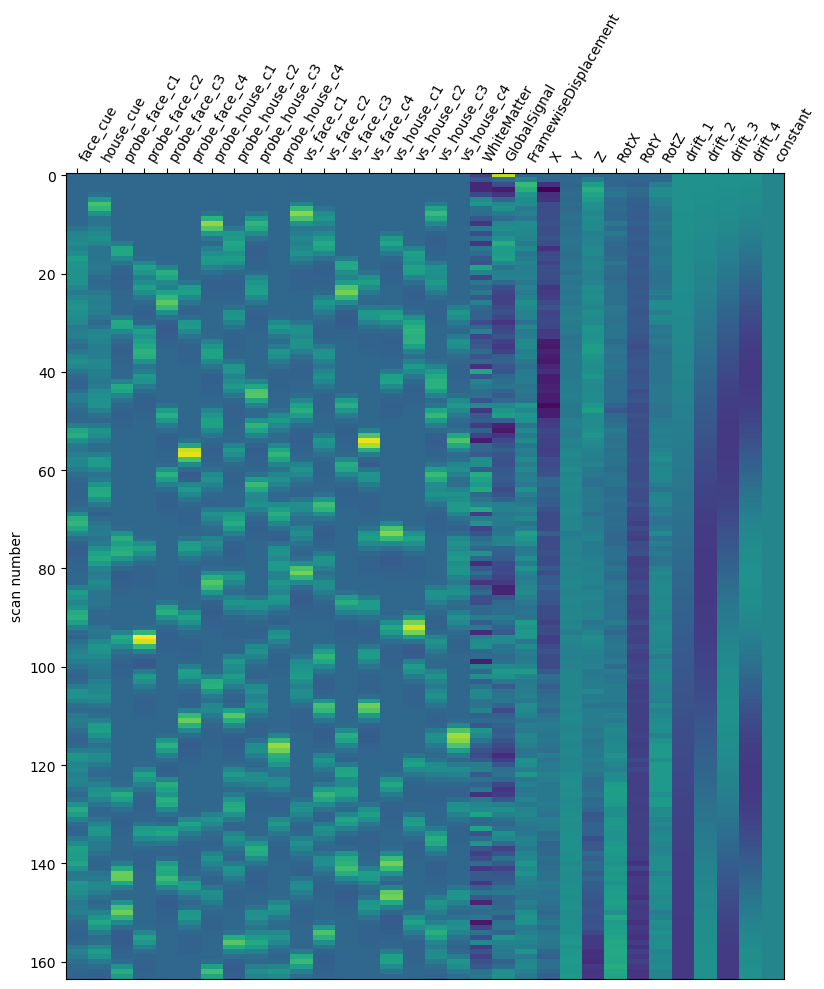

In [87]:
from nilearn.plotting import plot_design_matrix

# Obtain and plot design matrix
design_matrix = fmri_glm.design_matrices_[0]
plot_design_matrix(design_matrix)
plt.show()

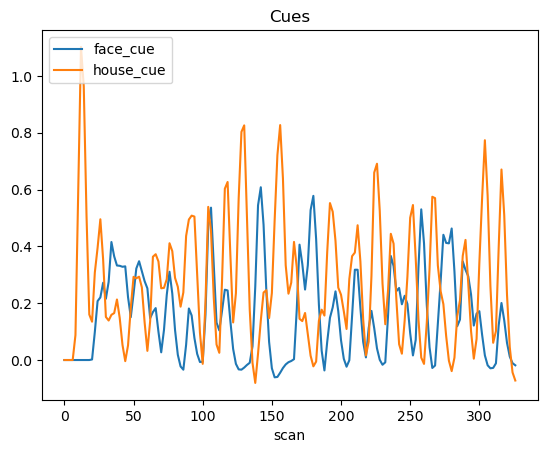

In [88]:
# Plot signals 
plt.plot(design_matrix['face_cue'], label='face_cue')
plt.plot(design_matrix['house_cue'], label='house_cue')
plt.xlabel('scan')
plt.title('Cues')
plt.legend(loc='upper left')
plt.show()


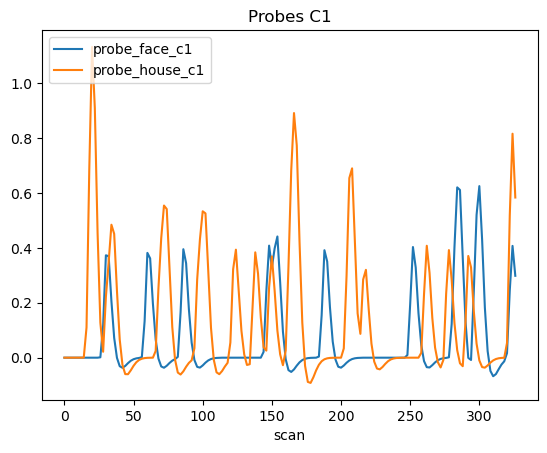

In [89]:
plt.plot(design_matrix['probe_face_c1'], label='probe_face_c1')
plt.plot(design_matrix['probe_house_c1'], label='probe_house_c1')
plt.xlabel('scan')
plt.title('Probes C1')
plt.legend(loc='upper left')
plt.show()

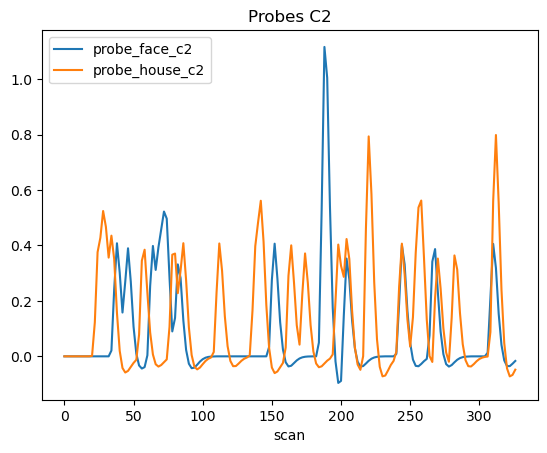

In [90]:
plt.plot(design_matrix['probe_face_c2'], label='probe_face_c2')
plt.plot(design_matrix['probe_house_c2'], label='probe_house_c2')
plt.xlabel('scan')
plt.title('Probes C2')
plt.legend(loc='upper left')
plt.show()

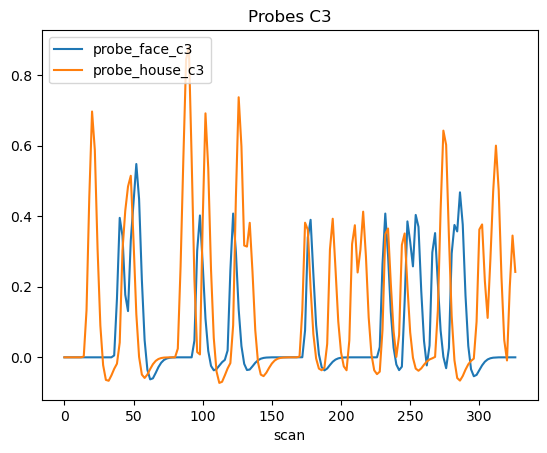

In [91]:
plt.plot(design_matrix['probe_face_c3'], label='probe_face_c3')
plt.plot(design_matrix['probe_house_c3'], label='probe_house_c3')
plt.xlabel('scan')
plt.title('Probes C3')
plt.legend(loc='upper left')
plt.show()

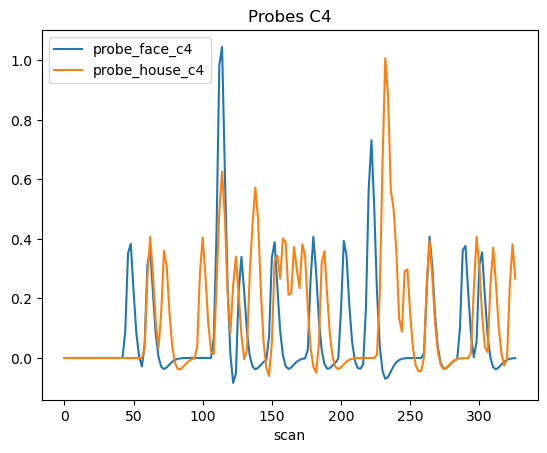

In [92]:
plt.plot(design_matrix['probe_face_c4'], label='probe_face_c4')
plt.plot(design_matrix['probe_house_c4'], label='probe_house_c4')
plt.xlabel('scan')
plt.title('Probes C4')
plt.legend(loc='upper left')
plt.show()

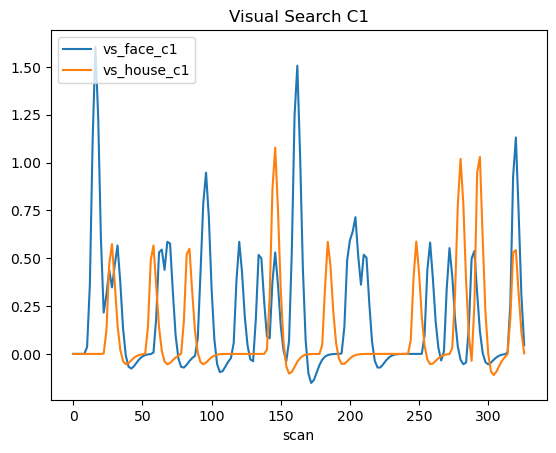

In [93]:
plt.plot(design_matrix['vs_face_c1'], label='vs_face_c1')
plt.plot(design_matrix['vs_house_c1'], label='vs_house_c1')
plt.xlabel('scan')
plt.title('Visual Search C1')
plt.legend(loc='upper left')
plt.show()

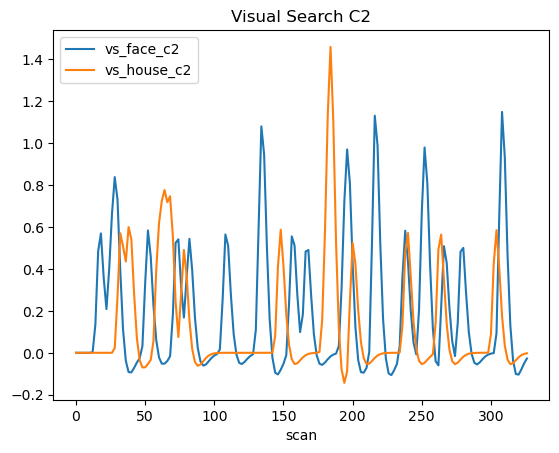

In [94]:
plt.plot(design_matrix['vs_face_c2'], label='vs_face_c2')
plt.plot(design_matrix['vs_house_c2'], label='vs_house_c2')
plt.xlabel('scan')
plt.title('Visual Search C2')
plt.legend(loc='upper left')
plt.show()

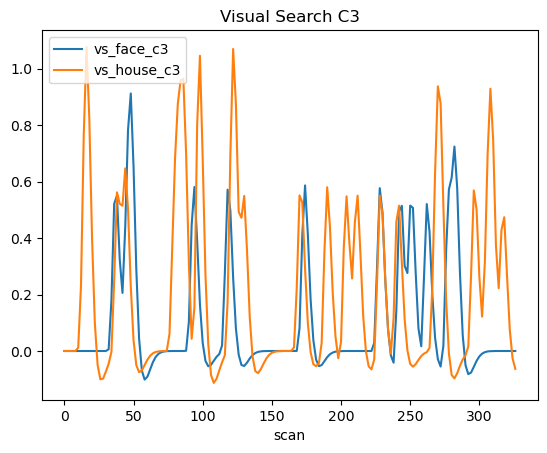

In [95]:
plt.plot(design_matrix['vs_face_c3'], label='vs_face_c3')
plt.plot(design_matrix['vs_house_c3'], label='vs_house_c3')
plt.xlabel('scan')
plt.title('Visual Search C3')
plt.legend(loc='upper left')
plt.show()

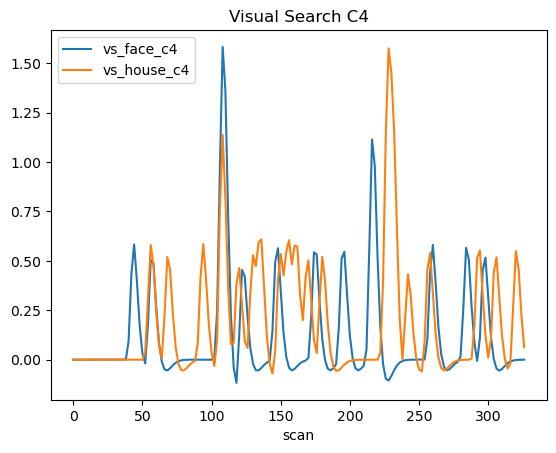

In [96]:
plt.plot(design_matrix['vs_face_c4'], label='vs_face_c4')
plt.plot(design_matrix['vs_house_c4'], label='vs_house_c4')
plt.xlabel('scan')
plt.title('Visual Search C4')
plt.legend(loc='upper left')
plt.show()

In [97]:
# Generating arrays to access contrasts
m, n = design_matrix.shape

print(m)
print(n)

face_cue_c = np.zeros(n)
print(face_cue_c.shape)
face_cue_c[0] = 1

house_cue_c = np.zeros(n)
house_cue_c[1] = 1


164
32
(32,)


In [98]:
from nilearn.glm.thresholding import threshold_stats_img

# Get raw contrast activation
z_map = fmri_glm.compute_contrast(face_cue_c, output_type='z_score')

# Get clean contrast and threshold to visualize results
# Threshold: false discovery rate 5% w/ cluster > 8 voxels
clean_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr', cluster_threshold=8)
s_threshold = str(round(threshold, 1))

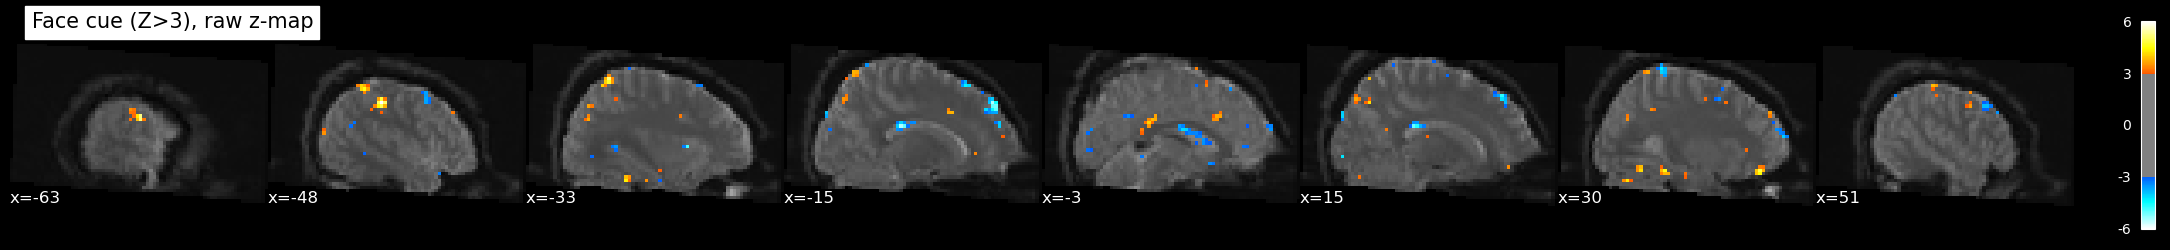

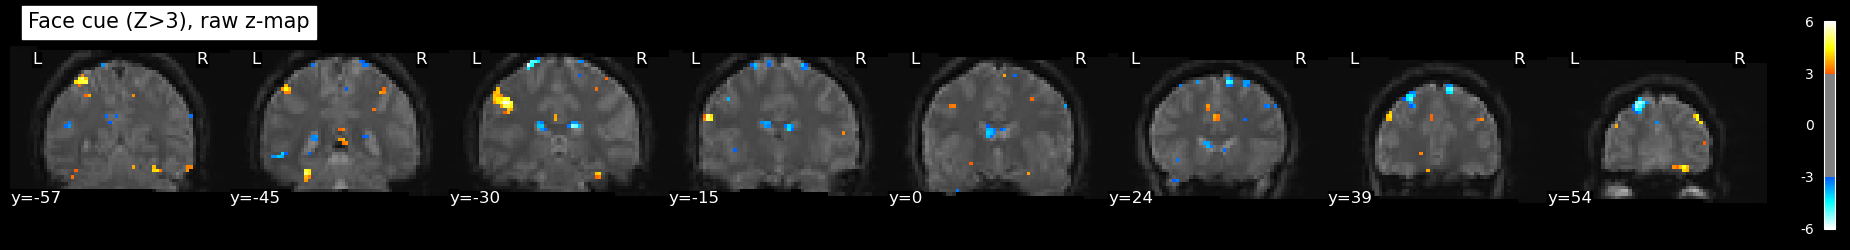

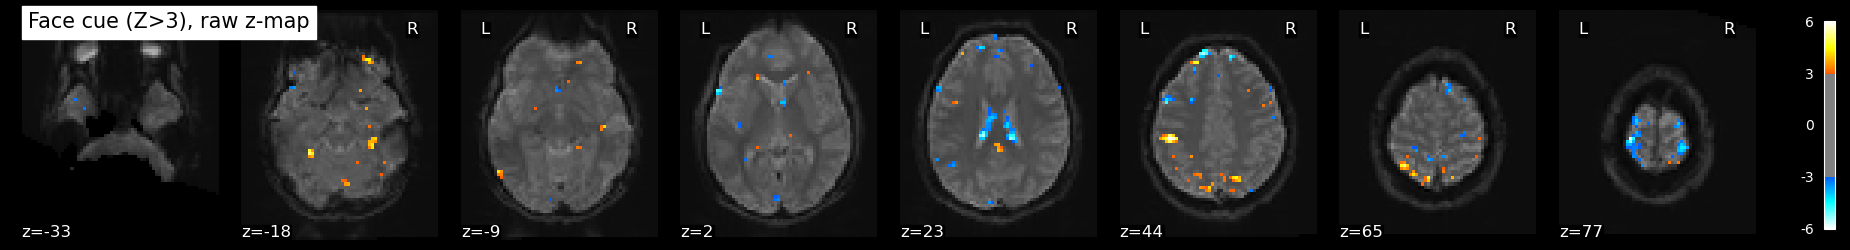

In [102]:
# Visualize results
dim = ['x', 'y', 'z']

for x in range(3):
    
    plot_stat_map(z_map, bg_img=mean_img, threshold=3,
              display_mode=dim[x], cut_coords=8, black_bg=True,
              title=('Face cue (Z>3), raw z-map' )) #'Face cue not->(Z>' + s_threshold + '), fdr = .05'
    plt.show()

In [103]:
# Get raw contrast activation
z_map = fmri_glm.compute_contrast(house_cue_c, output_type='z_score')

# Get clean contrast and threshold to visualize results
# Threshold: false discovery rate 5% w/ cluster > 8 voxels
clean_map, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr', cluster_threshold=8)
s_threshold = str(round(threshold, 1))

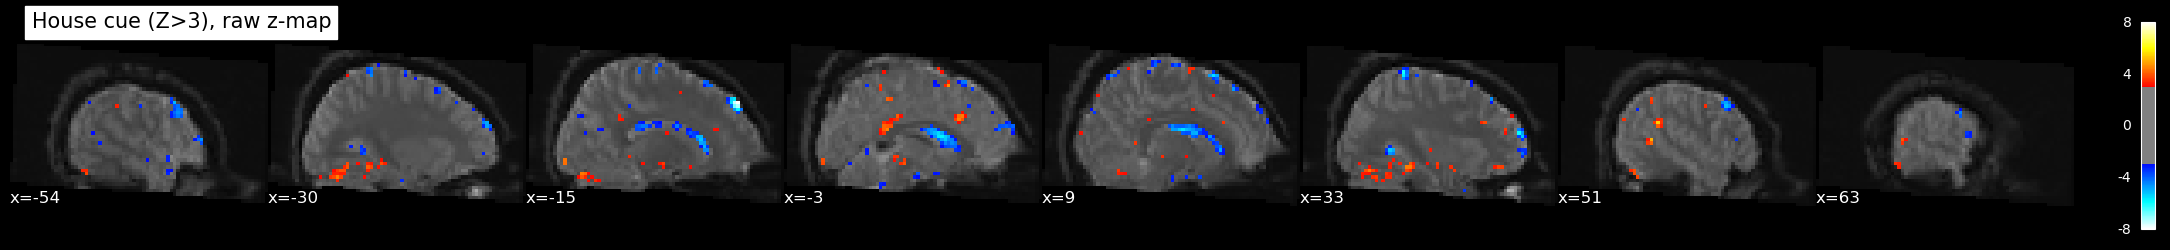

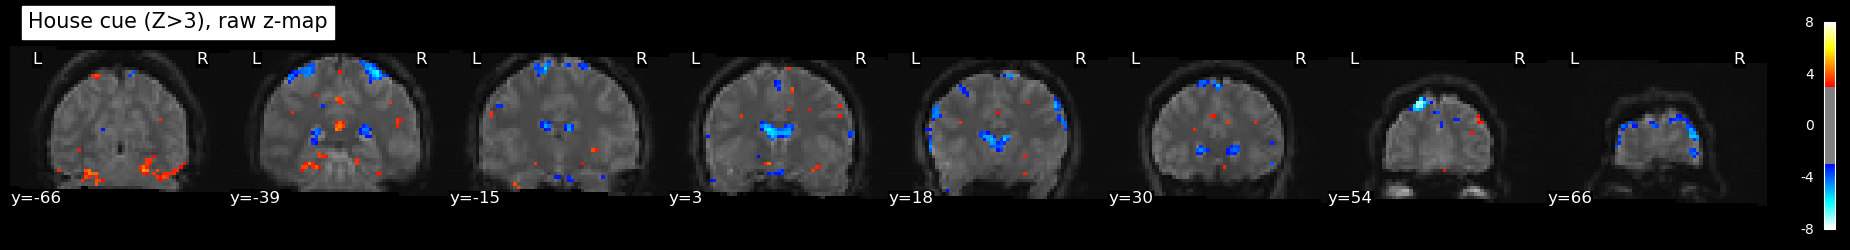

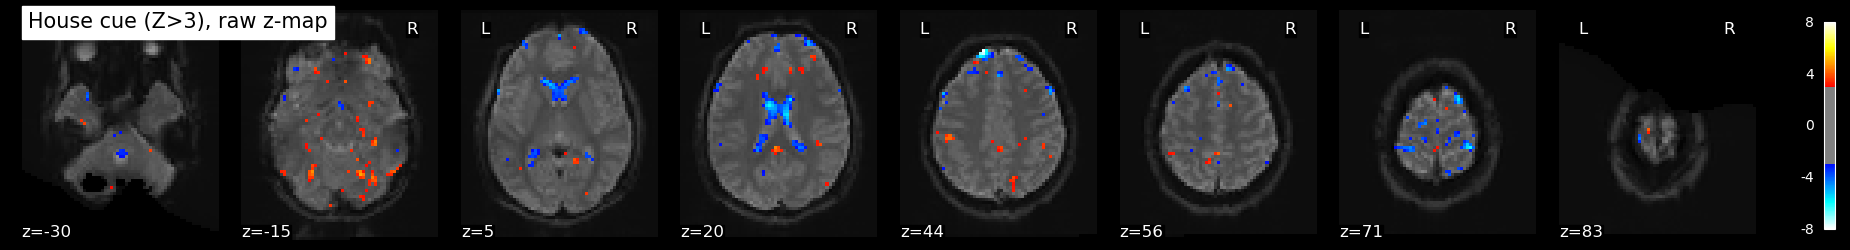

In [104]:
# Visualize results
dim = ['x', 'y', 'z']

for x in range(3):
    
    plot_stat_map(z_map, bg_img=mean_img, threshold=3,
              display_mode=dim[x], cut_coords=8, black_bg=True,
              title=('House cue (Z>3), raw z-map'))
    plt.show()